In [1]:
%%html
<style>
    pre.cd {
            border: 1px dashed #93A1A1;
            padding: 0.5em 0.8em;
            background: #FCF6E3;
    }
    .highlight{
        backgound: #FCF6E3 ;
    }
    .hll { background-color: #ffffcc }
    .c { color: #93a1a1; font-style: italic } /* Comment */
    .err { color: #dc322f } /* Error */
    .g { color: #657b83 } /* Generic */
    .k { color: #859900 } /* Keyword */
    .l { color: #657b83 } /* Literal */
    .n { color: #586e75 } /* Name */
    .o { color: #657b83 } /* Operator */
    .x { color: #657b83 } /* Other */
    .p { color: #657b83 } /* Punctuation */
    .cm { color: #93a1a1; font-style: italic } /* Comment.Multiline */
    .cp { color: #93a1a1; font-style: italic } /* Comment.Preproc */
    .c1 { color: #93a1a1; font-style: italic } /* Comment.Single */
    .cs { color: #93a1a1; font-style: italic } /* Comment.Special */
    .gd { color: #657b83 } /* Generic.Deleted */
    .ge { color: #657b83 } /* Generic.Emph */
    .gr { color: #657b83 } /* Generic.Error */
    .gh { color: #657b83 } /* Generic.Heading */
    .gi { color: #657b83 } /* Generic.Inserted */
    .go { color: #000000 } /* Generic.Output (customized) */
    .gp { color: #cb4b16 } /* Generic.Prompt (customized) */
    .gs { color: #657b83 } /* Generic.Strong */
    .gu { color: #657b83 } /* Generic.Subheading */
    .gt { color: #657b83 } /* Generic.Traceback */
    .kc { color: #859900 } /* Keyword.Constant */
    .kd { color: #859900 } /* Keyword.Declaration */
    .kn { color: #cb4b16 } /* Keyword.Namespace */
    .kp { color: #cb4b16 } /* Keyword.Pseudo */
    .kr { color: #859900 } /* Keyword.Reserved */
    .kt { color: #859900 } /* Keyword.Type */
    .ld { color: #657b83 } /* Literal.Date */
    .m { color: #2aa198 } /* Literal.Number */
    .s { color: #2aa198 } /* Literal.String */
    .na { color: #657b83 } /* Name.Attribute */
    .nb { color: #268bd2 } /* Name.Builtin */
    .nc { color: #268bd2 } /* Name.Class */
    .no { color: #b58900 } /* Name.Constant */
    .nd { color: #cb4b16 } /* Name.Decorator */
    .ni { color: #cb4b16 } /* Name.Entity */
    .ne { color: #cb4b16 } /* Name.Exception */
    .nf { color: #268bd2 } /* Name.Function */
    .nl { color: #657b83 } /* Name.Label */
    .nn { color: #b58900 } /* Name.Namespace */
    .nx { color: #657b83 } /* Name.Other */
    .py { color: #268bd2 } /* Name.Property */
    .nt { color: #859900 } /* Name.Tag */
    .nv { color: #cd4b16 } /* Name.Variable */
    .ow { color: #859900 } /* Operator.Word */
    .w { color: #fdf6e3 } /* Text.Whitespace */
    .mf { color: #2aa198 } /* Literal.Number.Float */
    .mh { color: #2aa198 } /* Literal.Number.Hex */
    .mi { color: #2aa198 } /* Literal.Number.Integer */
    .mo { color: #2aa198 } /* Literal.Number.Oct */
    .sb { color: #2aa198 } /* Literal.String.Backtick */
    .sc { color: #2aa198 } /* Literal.String.Char */
    .sd { color: #2aa198 } /* Literal.String.Doc */
    .s2 { color: #2aa198 } /* Literal.String.Double */
    .se { color: #cb4b16 } /* Literal.String.Escape */
    .sh { color: #2aa198 } /* Literal.String.Heredoc */
    .si { color: #cb4b16 } /* Literal.String.Interpol */
    .sx { color: #2aa198 } /* Literal.String.Other */
    .sr { color: #2aa198 } /* Literal.String.Regex */
    .s1 { color: #2aa198 } /* Literal.String.Single */
    .ss { color: #2aa198 } /* Literal.String.Symbol */
    .bp { color: #268bd2; font-weight: bold } /* Name.Builtin.Pseudo */
    .vc { color: #268bd2 } /* Name.Variable.Class */
    .vg { color: #268bd2 } /* Name.Variable.Global */
    .vi { color: #268bd2 } /* Name.Variable.Instance */
    .il { color: #2aa198 } /* Literal.Number.Integer.Long */
    div.verdict-div{
        background: #EEEEEE; 
        padding: 30px
    }
    p.verdict-title{
        text-align: center;
        font-weight: bold;
    }
</style>

<div class="verdict-div"><p class="verdict-title">Verdict</p>

The full-fledged Builder Pattern as imagined by the Gang of Four arranged for a single series of method calls to power the creation of several different object hierarchies — but that use of the pattern has turned out to be vanishingly rare in Python. Instead, the Builder is wildly popular simply for its convenience.

You might also have seen a more recent pattern calling itself the “Builder” which pairs each immutable class in a program with a more convenient builder class. That pattern, happily, is never necessary in Python since the language itself provides built-in syntactic support for optional constructor arguments.</div>

# The Builder Pattern
The Builder pattern has a most interesting history. Its primary intent, as described by the Gang of Four in the very first sentence of their chapter on the pattern, has wound being the rarest purpose for which the pattern is used. Instead, the Builder is used almost everywhere for what the Gang of Four considered a secondary benefit: its convenience.

More recently, an even simpler pattern has adopted the name “Builder” that appears in certain less expressive programming languages to make up for their lack of optional parameters in a call to a constructor.

This article will start by describing the Builder pattern’s most popular use in Python programs. Next we will glance at what the Gang of Four thought the pattern’s primary purpose was going to be, and explore why it is rarely used that way in Python. Finally, for completeness, we will look at the more recent use of the pattern to help languages whose syntax is less flexible than Python’s.

## The Builder as convenience
The Builder pattern is wildly popular in Python because it lets client code stay simple and sleek even while directing the creation of an elaborate hierarchy of objects.

The formal definition is that the Builder pattern is present whenever a library lets you make a simple series of function and method calls that, behind the scenes, the library reacts to by building a whole hierarchy of objects. Thanks to the Builder pattern, the caller is exempted from needing to manually instantiate each object or understand how the objects fit together once constructed.

A classic example in Python is the matplotlib library’s `pyplot` interface. It lets the caller build a simple plot with just a single line of code, and save the diagram to disk with just one line more:

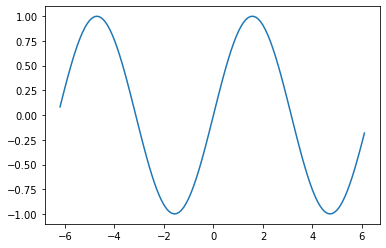

In [2]:
import numpy as np
x = np.arange(-6.2, 6.2, 0.1)

import matplotlib.pyplot as plt
plt.plot(x, np.sin(x))
#plt.savefig('sine.png')

What the pyplot interface has hidden from the caller is that more than a dozen objects had to be created for matplotlib to represent even this simple plot. Here, for example, are eight of the objects that were generated behind the scenes by the `plot()` call above:

<pre class="cd"><span></span><span class="gp">&gt;&gt;&gt; </span><span class="n">plt</span><span class="o">.</span><span class="n">gcf</span><span class="p">()</span>
<span class="go">&lt;Figure size 640x480 with 1 Axes&gt;</span>
</pre>

<pre class="cd"><span></span><span class="gp">&gt;&gt;&gt; </span><span class="n">plt</span><span class="o">.</span><span class="n">gcf</span><span class="p">()</span><span class="o">.</span><span class="n">subplots</span><span class="p">()</span>
<span class="go">&lt;matplotlib.axes._subplots.AxesSubplot object at 0x7ff910917a20&gt;</span>
</pre>

<pre class="cd"><span></span><span class="gp">&gt;&gt;&gt; </span><span class="n">plt</span><span class="o">.</span><span class="n">gcf</span><span class="p">()</span><span class="o">.</span><span class="n">subplots</span><span class="p">()</span><span class="o">.</span><span class="n">bbox</span>
<span class="go">TransformedBbox(</span>
<span class="go">    Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88),</span>
<span class="go">    BboxTransformTo(</span>
<span class="go">        TransformedBbox(</span>
<span class="go">            Bbox(x0=0.0, y0=0.0, x1=6.4, y1=4.8),</span>
<span class="go">            Affine2D(</span>
<span class="go">                [[100.   0.   0.]</span>
<span class="go">                 [  0. 100.   0.]</span>
<span class="go">                 [  0.   0.   1.]]))))</span>
</pre>

While matplotlib will let us provide more keyword arguments or make additional calls to customize the plot, `pyplot` is happy to insulate us from all of the details of how plots are represented as objects.

The Builder pattern is now deeply ingrained in Python culture thanks in part to the pressure that library authors feel to make the sample code on their front page as impressively brief as possible. But even in the face of this pressure, there still exist libraries that expect you — their caller — to build an entire object hierarchy yourself in the course of using the library.

The fact that some libraries rely on their callers to tediously instantiate objects is even used as advertisement by their competitors. For example, the Requests library famously introduces itself to users by comparing its one-liner for an HTTP request with authentication to the same maneuver performed with the old urllib2 Standard Library module — which, in fairness, does require the caller to build a small pile of objects any time they want to do anything interesting. The “Examples” section of the `urllib2` documentation provides an illustration:

<pre class="cd"><span></span><span class="kn">import</span> <span class="nn">urllib2</span>

<span class="c1"># Create an OpenerDirector with support for Basic HTTP Authentication...</span>

<span class="n">auth_handler</span> <span class="o">=</span> <span class="n">urllib2</span><span class="o">.</span><span class="n">HTTPBasicAuthHandler</span><span class="p">()</span>
<span class="n">auth_handler</span><span class="o">.</span><span class="n">add_password</span><span class="p">(</span><span class="n">realm</span><span class="o">=</span><span class="s1">'PDQ Application'</span><span class="p">,</span>
                          <span class="n">uri</span><span class="o">=</span><span class="s1">'https://mahler:8092/site-updates.py'</span><span class="p">,</span>
                          <span class="n">user</span><span class="o">=</span><span class="s1">'klem'</span><span class="p">,</span>
                          <span class="n">passwd</span><span class="o">=</span><span class="s1">'kadidd!ehopper'</span><span class="p">)</span>
<span class="n">opener</span> <span class="o">=</span> <span class="n">urllib2</span><span class="o">.</span><span class="n">build_opener</span><span class="p">(</span><span class="n">auth_handler</span><span class="p">)</span>

<span class="c1"># ...and install it globally so it can be used with urlopen.</span>

<span class="n">urllib2</span><span class="o">.</span><span class="n">install_opener</span><span class="p">(</span><span class="n">opener</span><span class="p">)</span>
<span class="n">urllib2</span><span class="o">.</span><span class="n">urlopen</span><span class="p">(</span><span class="s1">'http://www.example.com/login.html'</span><span class="p">)</span>
</pre>

Had the Builder pattern been used here, the library would instead have offered functions or methods that concealed from client code the structure and classes in the opener - builder - authentication handler hierarchy.

## Nuance
My claim that the matplotlib `pyplot` interface is a Builder is complicated by the second-to-last paragraph in the Gang of Four’s chapter on the Builder:

<div class="verdict-div">“Builder <span style="font-weight:bold">returns the product as a final step</span>, but as far as the Abstract Factory pattern is concerned, the product gets returned immediately.”</div>

While this stipulation focuses on the difference between the Builder and the Abstract Factory, it makes clear that — for the Gang of Four — both patterns are supposed to conclude with the return of the constructed object to the caller. Absent the crucial final step of returning the object that has been built, the Builder arguably devolves into the Facade pattern instead.

So by the strict definition, `pyplot` might not qualify as a Builder in my example code above because I never ask for an actual reference to the object that my `plot()` call constructed. To rescue my example in case anyone decides to press the point, I can ask for a reference to the plot and ask the plot itself to save a rendered image to a file.

<pre class="cd"><span></span><span class="n">plt</span><span class="o">.</span><span class="n">plot</span><span class="p">(</span><span class="n">x</span><span class="p">,</span> <span class="n">np</span><span class="o">.</span><span class="n">sin</span><span class="p">(</span><span class="n">x</span><span class="p">))</span>
<span class="n">sine_figure</span> <span class="o">=</span> <span class="n">plt</span><span class="o">.</span><span class="n">gcf</span><span class="p">()</span>  <span class="c1"># “gcf” = “get current figure”</span>
<span class="n">sine_figure</span><span class="o">.</span><span class="n">savefig</span><span class="p">(</span><span class="s1">'sine.png'</span><span class="p">)</span>
</pre>

Such are the demands of pedantry: an extra line of code.

## Dueling builders
When the Gang of Four introduced the Builder, they had greater ambitions for the pattern than mere convenience and encapsulation. The opening sentence of their chapter on the Builder declared the following “Intent”:

<div class="verdict-div">“Separate the construction of a complex object from its representation so that the same construction process can create different representations.”</div>

For the Gang of Four, then, the Builder pattern is only operating at full tilt when a library offers several implementations of the same Builder, each of which returns a different hierarchy of objects in response to the same series of client calls.

I cannot find evidence that the full-tilt Builder pattern is in frequent use across today’s most popular python libraries.

Why has the pattern not come into widespread use?

I think the answer is the supremacy of data, and of data structures, as the common currency that is usually passed between one phase of a Python program’s execution and the next. To understand why, let’s turn to the Gang of Four’s own sample code. Here, for example, is one situation in which their Builder is placed as it responds to calls describing the creation of a maze (the example has been lightly edited to translate it into Python):

<pre class="cd"><span></span><span class="k">class</span> <span class="nc">StandardMazeBuilder</span><span class="p">(</span><span class="nb">object</span><span class="p">):</span>
    <span class="c1"># ...</span>
    <span class="k">def</span> <span class="nf">build_door</span><span class="p">(</span><span class="n">n1</span><span class="p">,</span> <span class="n">n2</span><span class="p">):</span>
        <span class="n">room1</span> <span class="o">=</span> <span class="bp">self</span><span class="o">.</span><span class="n">_current_maze</span><span class="o">.</span><span class="n">get_room</span><span class="p">(</span><span class="n">n1</span><span class="p">)</span>
        <span class="n">room2</span> <span class="o">=</span> <span class="bp">self</span><span class="o">.</span><span class="n">_current_maze</span><span class="o">.</span><span class="n">get_room</span><span class="p">(</span><span class="n">n2</span><span class="p">)</span>
        <span class="n">door</span> <span class="o">=</span> <span class="n">Door</span><span class="p">(</span><span class="n">r1</span><span class="p">,</span> <span class="n">r2</span><span class="p">)</span>

        <span class="n">room1</span><span class="o">.</span><span class="n">set_side</span><span class="p">(</span><span class="n">common_wall</span><span class="p">(</span><span class="n">r1</span><span class="p">,</span> <span class="n">r2</span><span class="p">),</span> <span class="n">d</span><span class="p">)</span>
        <span class="n">room2</span><span class="o">.</span><span class="n">set_side</span><span class="p">(</span><span class="n">common_wall</span><span class="p">(</span><span class="n">r2</span><span class="p">,</span> <span class="n">r1</span><span class="p">),</span> <span class="n">d</span><span class="p">);</span>
</pre>

Notice the awkward responsive pattern into which the code is forced. It knows that a maze is under construction, but has to recover a reference to the maze by asking `self` for its `current_maze` attribute. It then has to make several adjustments to update the room objects with the new information so that subsequent interactions will start from a new state. This looks suspiciously like I/O code that has been contorted into a series of callbacks, each needing to re-fetch and re-assemble the current state of the world in order to ratchet its state machine forward one further click.

If a modern Python Library does want to drive two very different kinds of activity from the same series of client constructor calls, it would be very unusual for that library to offer two completely separate implementations of the same Builder interface — two builders that both have to be capable of being prodded through the same series of incremental client-driven updates to produce a coherent result.

Instead, modern python libraries are overwhelmingly likely to have a single implementation of a given Builder, one that produces a single well-defined intermediate representation from the caller’s function and method invocations. That representation, whether publicly documented or private and internal to the library, can then be provided as the input to any number of downstream transformation or output routines — whose processing will now be simpler because they are free to roam across the intermediate data structure at their own pace and in whatever order they want.

To compare the popularity of callback programming with the popularity of foregrounding an intermediate representation, compare the paltry number of Python libraries that use the Standard Library `lmx.sax` package — which learns about a document by responding to a long series of `startElement()` and `endElement()` calls — with the wide popularity of the ElementTree API that presumes the XML is already completely parsed and offers the caller a Document Object Module to traverse in whatever order it wants.

It is, therefore, probably Python’s very rich collection of data types for representing deep compound information — tuples, lists, dictionaries, classes — and the convenience of writing code to traverse them that has produced almost an entire absence of the full-tilt Builder pattern from today’s popular Python libraries.

## A degenerate case: simulating optional arguments
For the sake of completeness, I should describe an alternative Builder pattern that differs from the pattern described by the Gang of Four, in case you have seen it in blog posts or books and have been confused by the difference. It has arisen recently in some of the less convenient programming languages than Python, and substitutes for those languages’ lack of optional parameters.

The degenerate Builder addresses this problem:

+ A programmer designs a class with immutable attributes. Once a class instance is created, its attributes will be impossible to modify.


+ The class has not just one or two, but many attributes — imagine that it has a dozen.


+ The programmer is trapped in a programming language that lacks Python’s support for optional arguments. A call to the class constructor will need to supply a value for every single attribute each time the class is instantiated.


You can imagine the verbose and unhappy consequences. Not only will every single object instantiation have to specify every one of the dozen attributes, but if the language does not support keyword arguments then each value in the long list of attributes will also be unlabeled. Imagine reading a long list of values like `None` `None` `0` `''` `None` and trying to visually pair each value with the corresponding name in the attribute list. A comment next to each value can improve readability, but the language will not provide any guard rail if a later edit accidentally moves the comments out of sync with the actual attributes.

To escape their dilemma and achieve some approximation of the happy brevity that Python programmers take for granted, programmers facing this situation can supplement each class they write with a second class that serves as a builder for the first. The differences between the builder and the class it constructs are that:

+ The Builder class carries all the same attributes as the target class.


+ The Builder class is not immutable.


+ The Builder class requires very few arguments to instantiate. Most or all of its attributes start off with default values.


+ The Builder offers a mechanism for each attribute that starts with a default value to be rewritten with a different value.


+ Finally, the Builder offers a method that creates an instance of the original immutable class whose attributes are copied from the corresponding attributes of the Builder instance.


Here is a tiny example in Python — non-tiny examples are, alas, painful to read because of their rampant repetition:

<pre class="cd"><span></span><span class="c1"># Slightly less convenient in Python &lt; 3.6:</span>

<span class="kn">from</span> <span class="nn">typing</span> <span class="kn">import</span> <span class="n">NamedTuple</span>

<span class="k">class</span> <span class="nc">Port</span><span class="p">(</span><span class="n">NamedTuple</span><span class="p">):</span>
    <span class="n">number</span><span class="p">:</span> <span class="nb">int</span>
    <span class="n">name</span><span class="p">:</span> <span class="nb">str</span> <span class="o">=</span> <span class="s1">''</span>
    <span class="n">protocol</span><span class="p">:</span> <span class="nb">str</span> <span class="o">=</span> <span class="s1">''</span>

<span class="c1"># Real Python code takes advantage of optional arguments</span>
<span class="c1"># to specify whatever combination of attributes it wants:</span>

<span class="n">Port</span><span class="p">(</span><span class="mi">2</span><span class="p">)</span>
<span class="n">Port</span><span class="p">(</span><span class="mi">7</span><span class="p">,</span> <span class="s1">'echo'</span><span class="p">)</span>
<span class="n">Port</span><span class="p">(</span><span class="mi">69</span><span class="p">,</span> <span class="s1">'tftp'</span><span class="p">,</span> <span class="s1">'UDP'</span><span class="p">)</span>

<span class="c1"># Keyword arguments even let you skip earlier arguments:</span>

<span class="n">Port</span><span class="p">(</span><span class="mi">517</span><span class="p">,</span> <span class="n">protocol</span><span class="o">=</span><span class="s1">'UDP'</span><span class="p">)</span>

<span class="c1"># But what if Python lacked optional arguments?</span>
<span class="c1"># Then we might engage in contortions like:</span>

<span class="k">class</span> <span class="nc">PortBuilder</span><span class="p">(</span><span class="nb">object</span><span class="p">):</span>
    <span class="k">def</span> <span class="fm">__init__</span><span class="p">(</span><span class="bp">self</span><span class="p">,</span> <span class="n">port</span><span class="p">):</span>
        <span class="bp">self</span><span class="o">.</span><span class="n">port</span> <span class="o">=</span> <span class="n">port</span>
        <span class="bp">self</span><span class="o">.</span><span class="n">name</span> <span class="o">=</span> <span class="kc">None</span>
        <span class="bp">self</span><span class="o">.</span><span class="n">protocol</span> <span class="o">=</span> <span class="kc">None</span>

    <span class="k">def</span> <span class="nf">build</span><span class="p">(</span><span class="bp">self</span><span class="p">):</span>
        <span class="k">return</span> <span class="n">Port</span><span class="p">(</span><span class="bp">self</span><span class="o">.</span><span class="n">port</span><span class="p">,</span> <span class="bp">self</span><span class="o">.</span><span class="n">name</span><span class="p">,</span> <span class="bp">self</span><span class="o">.</span><span class="n">protocol</span><span class="p">)</span>

<span class="c1"># The Builder lets the caller create a Port without</span>
<span class="c1"># needing to specify a value for every attribute.</span>
<span class="c1"># Here we skip providing a “name”:</span>

<span class="n">b</span> <span class="o">=</span> <span class="n">PortBuilder</span><span class="p">(</span><span class="mi">517</span><span class="p">)</span>
<span class="n">b</span><span class="o">.</span><span class="n">protocol</span> <span class="o">=</span> <span class="s1">'UDP'</span>
<span class="n">b</span><span class="o">.</span><span class="n">build</span><span class="p">()</span>
</pre>

At the expense of a good deal of boilerplate — which becomes even worse if the author insists on writing a setter for each of the Builder’s attributes — this pattern allows programmers in deeply compromised programming languages to enjoy some of the same conveniences that are built into the design of the Python “call” operator.

This is clearly not the Builder pattern from the Gang of Four. It fails to achieve every one of the “Consequences” their chapter lists for the Builder pattern: its `build()` method always returns the same class, instead of exercising the freedom to return any of several subclasses of the target class; it does not isolate the caller from how the target class represents its data since the builder and target attributes correspond one-to-one; and no fine control over the build process is achieved since the effect is the same — though less verbose — as if the caller had simply instantiated the target class directly.

Hopefully you will never see a Builder like this in Python, even to correct the awkward fact that named tuples provide no obvious way to set a default value for each field — the excellent answers to this Stack Overflow question provide several more Pythonic alternatives. But you might see it in other languages when reading or even porting their code, in which case you will want to recognize the pattern so that you can replace it with something simpler if the code is re-implemented in Python.